In [1]:
# import libraries
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 

In [2]:
# generate random data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

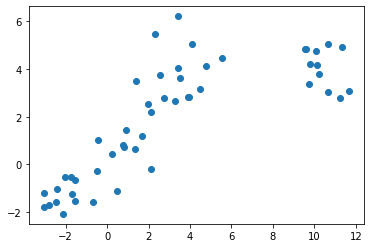

In [3]:
# plot the scatter plot of the randomly generated data
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [4]:
# we will start by clustering the random data points we have created.  We will set the number of clusters to form (and the number of centroids to generate) to 4
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [5]:
# fit the model 
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

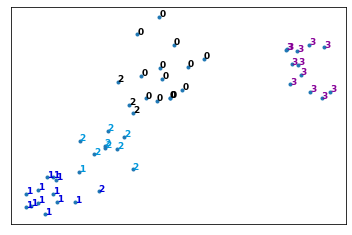

In [6]:
# show the clustering
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [7]:
# print out the distance matrix to ensure it's correct
# remember that distance values are symmetric, with a diagonal of 0s
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.96358178 1.14558669 ... 0.52757792 0.7147031  0.25090952]
 [0.96358178 0.         0.20674024 ... 0.60068239 0.28918139 0.87100001]
 [1.14558669 0.20674024 0.         ... 0.72579368 0.43758202 1.07085394]
 ...
 [0.52757792 0.60068239 0.72579368 ... 0.         0.31239709 0.60326934]
 [0.7147031  0.28918139 0.43758202 ... 0.31239709 0.         0.67776185]
 [0.25090952 0.87100001 1.07085394 ... 0.60326934 0.67776185 0.        ]]


In [8]:
# using the linkage class from the hierarchy, pass in the parameters
Z = hierarchy.linkage(dist_matrix, 'complete')

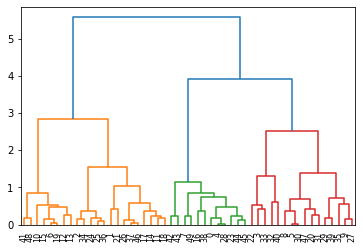

In [9]:
# display the dendogram
dendro = hierarchy.dendrogram(Z)

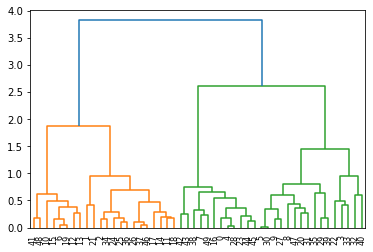

In [10]:
# now change to average linkage and see how the dendogram changes
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)